In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np

In [2]:
F = 7
L = 6
N = (L + F) * 100

In [4]:
model1 = CmdStanModel(stan_file='code_1.stan')
model2 = CmdStanModel(stan_file='code_2.stan')
model3 = CmdStanModel(stan_file='code_3.stan')
model4 = CmdStanModel(stan_file='code_4.stan')
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_1.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_1
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_1
INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_2.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_2
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_2
INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_3.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_3
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_3
INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_4.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab7/code_4
INFO:cmdstanpy:compiled model executabl

## Exercise 1

In [6]:
result1 = model1.sample(data=dict(N=N))
result2 = model2.sample(data=dict(N=N))

INFO:cmdstanpy:CmdStan start processing
Widget Javascript not detected.  It may not be installed or enabled properly.


ERROR:cmdstanpy:Error in progress bar initialization:
	'FloatProgress' object has no attribute 'style'
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing


In [7]:
y_1 = result1.stan_variable("y")
y_2 = result2.stan_variable("y")

In [15]:
y_1_ = []
for row in np.transpose(y_1):
    y_1_.append(np.mean(row))
y_2_ = []
for row in np.transpose(y_2):
    y_2_.append(np.mean(row))

## Exercise 2

In [16]:
result3 = model3.sample(data=dict(N=N, y=y_1_))
result4 = model4.sample(data=dict(N=N, y=y_1_))

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing


<AxesSubplot:xlabel='Log'>

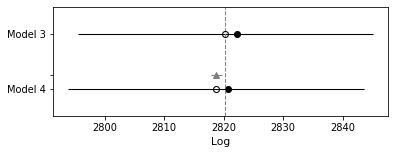

In [17]:
compare_dict = {"Model 3": result3, "Model 4": result4}
comparison = az.compare(compare_dict, ic="loo")
az.plot_compare(comparison)

<AxesSubplot:xlabel='Log'>

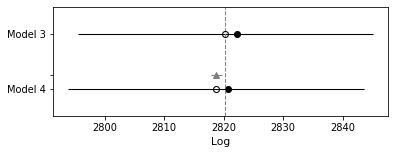

In [18]:
compare_dict = {"Model 3": result3, "Model 4": result4}
comparison = az.compare(compare_dict, ic="waic")
az.plot_compare(comparison)

## Exercise 3

In [19]:
y_hat=result4.stan_variable('y_hat')

X1=y_hat[0:1].transpose()
d1= {'N':N, 'K':1, 'y':y_1_ , 'X':X1 }
fit1=model5.sample(data=d1)

X2=y_hat[0:2].transpose()
d2 = {'N':N, 'K':2, 'y':y_1_ , 'X':X2 }
fit2=model5.sample(data=d2)

X3=y_hat[0:3].transpose()
d3 = {'N':N, 'K':3, 'y':y_1_ , 'X':X3 }
fit3=model5.sample(data=d3)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cm

<AxesSubplot:xlabel='Log'>

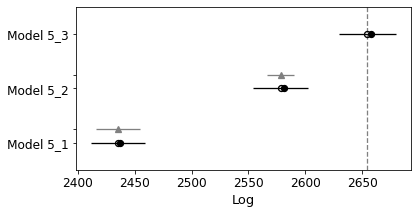

In [20]:
compare_dict = {"Model 5_1": fit1, "Model 5_2": fit2, "Model 5_3": fit3}
comparison = az.compare(compare_dict, ic="loo")
az.plot_compare(comparison)

<AxesSubplot:xlabel='Log'>

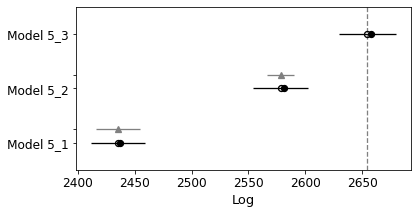

In [21]:
compare_dict = {"Model 5_1": fit1, "Model 5_2": fit2, "Model 5_3": fit3}
comparison = az.compare(compare_dict, ic="waic")
az.plot_compare(comparison)